In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns             #visualisation
import matplotlib.pyplot as plt   #visualisation
import os

%matplotlib inline 
sns.set(color_codes=True)

from dotenv import load_dotenv
from core_ds4a_project import cleaning, columns as project_columns, datasets

%load_ext autoreload
%autoreload 1
%aimport core_ds4a_project, core_ds4a_project.cleaning, core_ds4a_project.columns, core_ds4a_project.datasets

pd.set_option("display.max_columns", None)

Environment variables:

In [2]:
load_dotenv('envvars')

ROOT_DATA_PATH = os.environ.get('ROOT_DATA_PATH')
RAW_DATA_PATH = os.environ.get('RAW_DATA_PATH') or f'{ROOT_DATA_PATH}/raw'

Reading data:

In [3]:
(cartera_df, clientes_df, colocacion_df) = datasets.read_joining_datasets(dir_path=RAW_DATA_PATH)

<H2>EDA Clientes</H2>

In [4]:
clientes_df.shape

(22965, 27)

In [5]:
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22965 entries, 0 to 22964
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CLIENTE                  22965 non-null  object        
 1   EDAD                     22965 non-null  int32         
 2   ESTRATO                  22914 non-null  float64       
 3   SUCURSAL                 22964 non-null  object        
 4   TIPO_DE_CLIENTE          22965 non-null  category      
 5   SUELDO_BASICO            22965 non-null  float64       
 6   ACTIVIDAD_ECONOMICA      22743 non-null  object        
 7   TIPO_DE_IDENTIFICACION   22965 non-null  object        
 8   OFICIO                   19631 non-null  object        
 9   MUJER_CABEZA             22965 non-null  category      
 10  RESPONSABLE_DE_HOGAR     22508 non-null  category      
 11  OCUPACION                22783 non-null  object        
 12  ACTIVIDAD_CIIU_PRIMARIA  10116 n

In [6]:
# Finding the null values.
print(clientes_df.isnull().sum())

CLIENTE                        0
EDAD                           0
ESTRATO                       51
SUCURSAL                       1
TIPO_DE_CLIENTE                0
SUELDO_BASICO                  0
ACTIVIDAD_ECONOMICA          222
TIPO_DE_IDENTIFICACION         0
OFICIO                      3334
MUJER_CABEZA                   0
RESPONSABLE_DE_HOGAR         457
OCUPACION                    182
ACTIVIDAD_CIIU_PRIMARIA    12849
ESTADO_CIVIL_COD              83
GENERO_COD                     0
NIVEL_ESTUDIOS_COD            11
PROFESION_COD               8041
TIPO_UBICACION_COD             0
TIPO_VIVIENDA_COD            109
PROFESION                  14137
TIPO_UBICACION                89
FECHA_NACIMIENTO              19
GENERO                        19
NIVEL_ESTUDIOS               262
ESTADO_CIVIL                 460
TIPO_VIVIENDA                782
ACTIVIDAD                      0
dtype: int64


In [7]:
# Identify primary key
len(colocacion_df['CLIENTE'].unique())

22965

In [8]:
clientes_df.head()

,CLIENTE,EDAD,ESTRATO,SUCURSAL,TIPO_DE_CLIENTE,SUELDO_BASICO,ACTIVIDAD_ECONOMICA,TIPO_DE_IDENTIFICACION,OFICIO,MUJER_CABEZA,RESPONSABLE_DE_HOGAR,OCUPACION,ACTIVIDAD_CIIU_PRIMARIA,ESTADO_CIVIL_COD,GENERO_COD,NIVEL_ESTUDIOS_COD,PROFESION_COD,TIPO_UBICACION_COD,TIPO_VIVIENDA_COD,PROFESION,TIPO_UBICACION,FECHA_NACIMIENTO,GENERO,NIVEL_ESTUDIOS,ESTADO_CIVIL,TIPO_VIVIENDA,ACTIVIDAD
0,FA4940,25,2.0,YOPAL |1,Microfinanciero,0.0,Negocio o Microempresa |NM,Cedula |C,NaN,No |N,No |N,Independiente |2,NaN,S,M,T,NaN,1,F,NaN,URBANA,1997-02-12,Masculino,Tecnica,Soltero,FAMILIAR,Comercio |C
1,FA1852,48,1.0,YOPAL |1,Microfinanciero,0.0,Negocio o Microempresa |NM,Cedula |C,GANADERIA,No |N,Si |Y,Independiente |2,NaN,U,M,P,205,2,P,GANADERIA,RURAL,1973-12-11,Masculino,Primaria,Union libre,PROPIA,Produccion |P
2,FA2274,45,2.0,YOPAL |1,Microfinanciero,0.0,Negocio o Microempresa |NM,Cedula |C,NaN,Si |Y,No |N,Independiente |2,NaN,U,F,S,107,1,F,ADMON DE NEGOCIOS,URBANA,1976-11-19,Femenino,Secundaria,Union libre,FAMILIAR,Comercio |C
3,FA22995,44,1.0,YOPAL |1,Microfinanciero,0.0,Negocio o Microempresa |NM,Cedula |C,GANADERIA,No |N,Si |Y,Independiente |2,CRÍA DE GANADO BOVINO Y BUFALINO |141|A,U,M,P,205,2,O,GANADERIA,RURAL,1978-05-17,Masculino,Primaria,Union libre,OTRA,Produccion |P
4,FA15635,51,3.0,YOPAL |1,Microfinanciero,14104888.0,Negocio o Microempresa |NM,Cedula |C,ALMACEN Y TALLER DE MOTOS,No |N,Si |Y,Independiente |2,NaN,U,M,S,106,1,P,ADMON DE EMPRESAS,URBANA,1971-05-25,Masculino,Secundaria,Union libre,PROPIA,Comercio |C


In [49]:
clientes_df.SUELDO_BASICO = clientes_df.SUELDO_BASICO /1000000

In [50]:
clientes_df.SUELDO_BASICO.describe()

count    22965.000000
mean         0.303613
std          1.636770
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         84.000000
Name: SUELDO_BASICO, dtype: float64

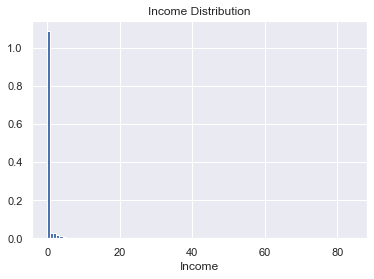

In [51]:
clientes_df.SUELDO_BASICO.hist(bins=100, density=True)
plt.title("Income Distribution")
plt.xlabel("Income");

C:\Anaconda\envs\ds4a\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 4.430816798843313] is not finite

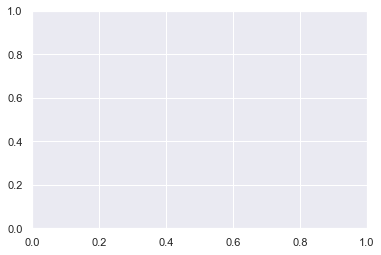

In [52]:
np.log(clientes_df.SUELDO_BASICO).hist(bins=100, density=True)
plt.title("Income Distribution")
plt.xlabel("Income")

In [9]:
clientes_df['ESTADO_CIVIL'].unique()

array(['Soltero', 'Union libre', 'Casado', nan, 'Divorciado', 'Viudo',
       'Otro'], dtype=object)

In [10]:
clientes_df['ESTADO_CIVIL_COD'].unique()

['S', 'U', 'C', NaN, 'D', 'V', 'O']
Categories (6, object): ['C', 'D', 'O', 'S', 'U', 'V']

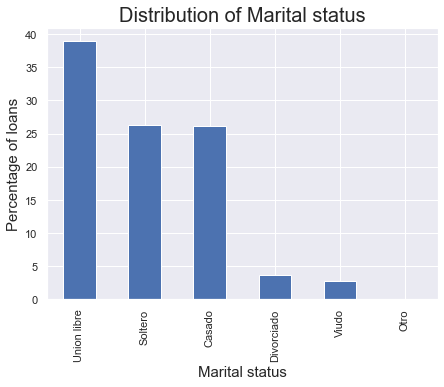

In [11]:
# Plotting a Histogram
((100*clientes_df.ESTADO_CIVIL.value_counts()[:10].nlargest(40))/len(clientes_df)).plot(kind='bar', figsize=(7,5))
plt.title("Distribution of Marital status", fontsize=20)
plt.ylabel("Percentage of loans", fontsize=15)
plt.xticks(rotation=90)
plt.xlabel("Marital status", fontsize=15);

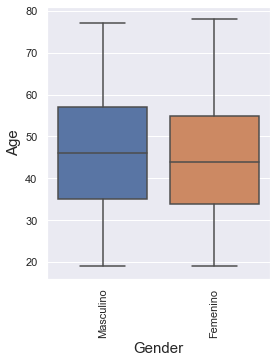

In [12]:
plt.figure(figsize= (4,5))
sns.boxplot(x="GENERO", y="EDAD", data=clientes_df)
plt.xticks(rotation=90)
plt.ylabel("Age", fontsize=15)
plt.xlabel("Gender", fontsize=15);

In [13]:
clientes_df['EDAD'].describe()

count    22965.000000
mean        45.351578
std         13.412028
min         19.000000
25%         34.000000
50%         45.000000
75%         56.000000
max         78.000000
Name: EDAD, dtype: float64

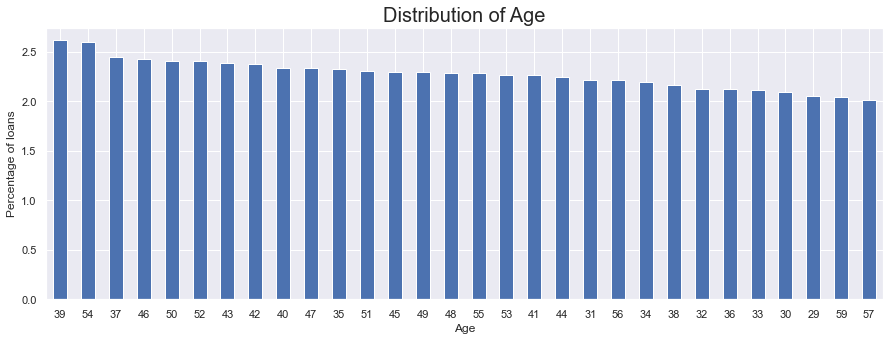

In [14]:
# Plotting a Histogram
((100*clientes_df.EDAD.value_counts()[:30].nlargest(40))/len(clientes_df)).plot(kind='bar', figsize=(15,5))
plt.title("Distribution of Age", fontsize=20)
plt.xticks(rotation=0)
plt.ylabel("Percentage of loans")
plt.xlabel("Age");

Text(0, 0.5, 'Frequency')

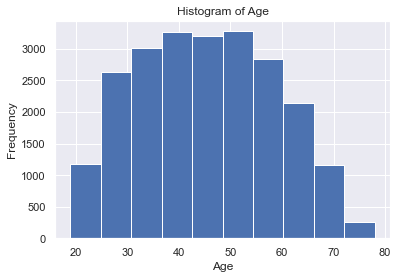

In [15]:
clientes_df.EDAD.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [16]:
clientes_df['TIPO_DE_CLIENTE'].unique()

['Microfinanciero', 'Gestion social', 'Mixto', 'Codeudor no cliente', 'Empleado Req.Servicios', 'Proveedor', 'Fondeador']
Categories (7, object): ['Codeudor no cliente', 'Empleado Req.Servicios', 'Fondeador', 'Gestion social', 'Microfinanciero', 'Mixto', 'Proveedor']

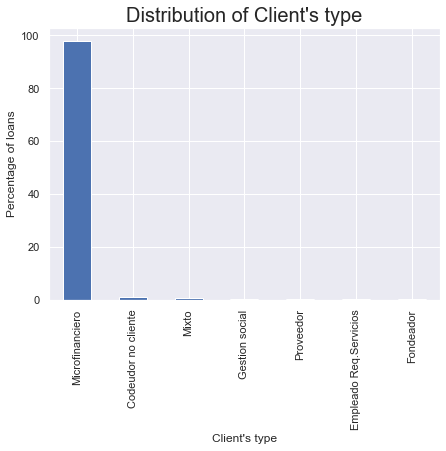

In [17]:
# Plotting a Histogram
((100*clientes_df.TIPO_DE_CLIENTE.value_counts()[:10].nlargest(40))/len(clientes_df)).plot(kind='bar', figsize=(7,5))
plt.title("Distribution of Client's type", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Percentage of loans")
plt.xlabel("Client's type");

In [18]:
clientes_df['TIPO_VIVIENDA'].unique()

['FAMILIAR', 'PROPIA', 'OTRA', 'ARRIENDO', NaN, 'HIPOTECA']
Categories (6, object): ['ARRIENDO', 'FAMILIAR', 'HIPOTECA', 'OTRA', 'PROPIA', 'SIN_VIVIENDA']

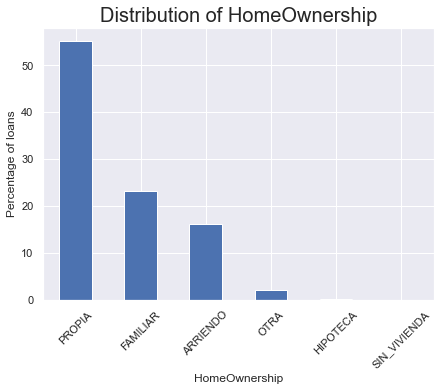

In [19]:
# Plotting a Histogram
((100*clientes_df.TIPO_VIVIENDA.value_counts()[:10].nlargest(40))/len(clientes_df)).plot(kind='bar', figsize=(7,5))
plt.title("Distribution of HomeOwnership", fontsize=20)
plt.xticks(rotation=45)
plt.ylabel("Percentage of loans")
plt.xlabel("HomeOwnership");

In [20]:
clientes_df['TIPO_UBICACION'].unique()

array(['URBANA', 'RURAL', nan], dtype=object)

In [21]:
clientes_df['TIPO_UBICACION_COD'].unique()

['1', '2']
Categories (2, object): ['1', '2']

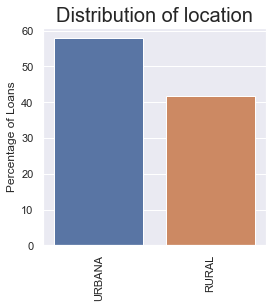

In [22]:
plt.figure(figsize= (4,4))
sns.barplot(x=clientes_df["TIPO_UBICACION"].value_counts()[:5].index.values , 
            y=100 * clientes_df.TIPO_UBICACION.value_counts()[:5].values / len(clientes_df),
            orient="v")
plt.xticks(rotation=90)
plt.ylabel("Percentage of Loans")
plt.title("Distribution of location", fontsize=20);

In [23]:
clientes_df['GENERO'].unique()

array(['Masculino', 'Femenino', nan], dtype=object)

In [24]:
clientes_df['GENERO_COD'].unique()

['M', 'F']
Categories (2, object): ['F', 'M']

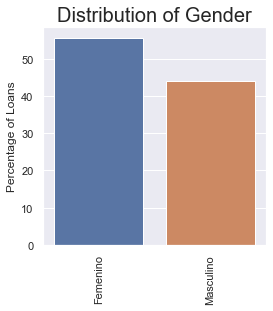

In [25]:
plt.figure(figsize= (4,4))
sns.barplot(x=clientes_df["GENERO"].value_counts()[:10].index.values , 
            y=100 * clientes_df.GENERO.value_counts()[:10].values / len(clientes_df),
            orient="v")
plt.xticks(rotation=90)
plt.ylabel("Percentage of Loans")
plt.title("Distribution of Gender", fontsize=20);

In [26]:
clientes_df['NIVEL_ESTUDIOS'].unique()

array(['Tecnica', 'Primaria', 'Secundaria', 'Universitaria',
       'Tecnológica', 'Analfabetismo', 'No escolarizado',
       'Especializacion', nan, 'No indica', 'Magister', 'Maestria'],
      dtype=object)

In [27]:
clientes_df['NIVEL_ESTUDIOS_COD'].unique()

['T', 'P', 'S', 'U', 'V', ..., 'E', NaN, 'X', 'M', 'I']
Length: 12
Categories (12, object): ['A', 'C', 'D', 'E', ..., 'T', 'U', 'V', 'X']

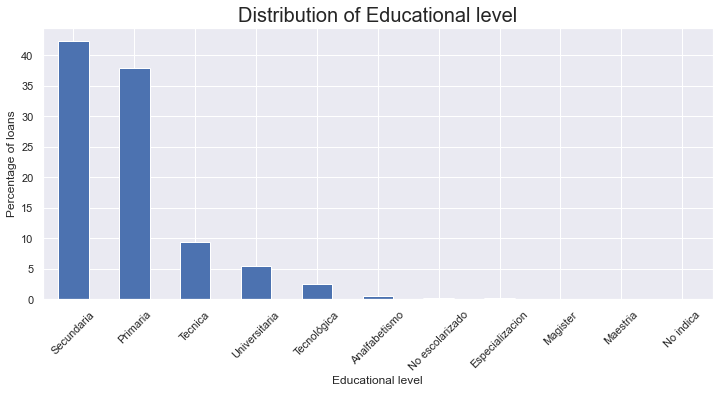

In [28]:
# Plotting a Histogram
((100*clientes_df.NIVEL_ESTUDIOS.value_counts()[:15].nlargest(40))/len(clientes_df)).plot(kind='bar', figsize=(12,5))
plt.title("Distribution of Educational level", fontsize=20)
plt.xticks(rotation=45)
plt.ylabel("Percentage of loans")
plt.xlabel("Educational level");

In [29]:
len(clientes_df[clientes_df['SUELDO_BASICO']>0])

2066

In [30]:
len(clientes_df[clientes_df['SUELDO_BASICO']==0])

20899

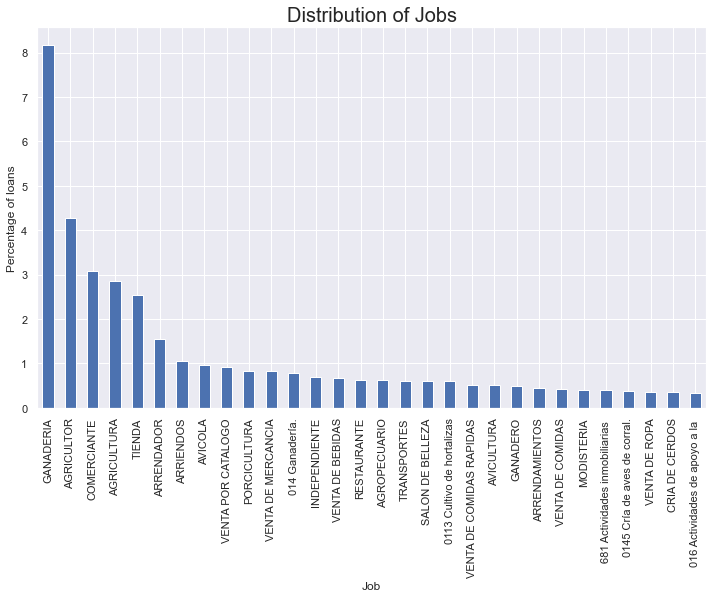

In [31]:
# Plotting a Histogram
((100*clientes_df.OFICIO.value_counts()[:30].nlargest(40))/len(clientes_df)).plot(kind='bar', figsize=(12,7))
plt.title("Distribution of Jobs", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Percentage of loans")
plt.xlabel("Job");

In [32]:
len(clientes_df['OFICIO'].unique())

4857

In [33]:
print(clientes_df['OFICIO'].isnull().sum())

3334


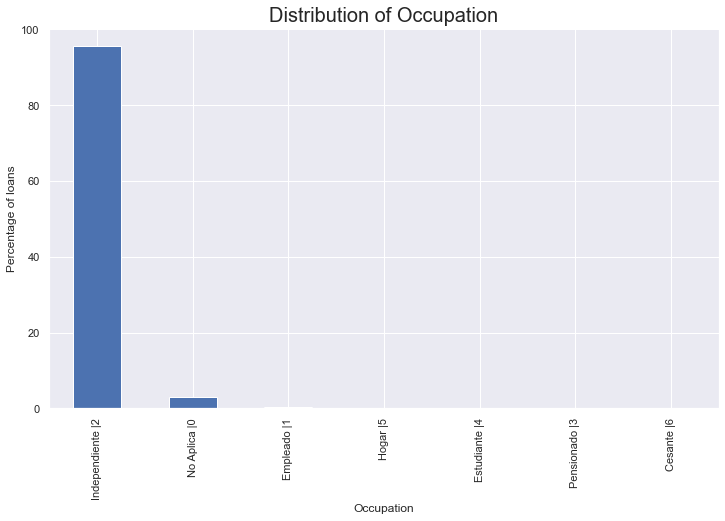

In [34]:
# Plotting a Histogram
((100*clientes_df.OCUPACION.value_counts()[:30].nlargest(40))/len(clientes_df)).plot(kind='bar', figsize=(12,7))
plt.title("Distribution of Occupation", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Percentage of loans")
plt.xlabel("Occupation");

In [35]:
len(clientes_df['OCUPACION'].unique())

8